## Install the necessary Libraries

In [1]:
!pip install timm phonemizer inflect streamlit -q
!npm install localtunnel -q
!sudo apt-get install espeak -q

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.793s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


   ╭────────────────────────────────────────────────────────────────╮
   │                                                                │
   │      New major version of npm available! 6.14.8 → 10.5.0       │
   │   Changelog: https://github.com/npm/cli/releases/tag/v10.5.0   │
   │               Run npm install -g npm to update!                │
   │                                                                │
   ╰───────────────────────────────

## To Get the Predicitions using Hugging face Models Pipelines

In [13]:
from PIL import Image, ImageDraw
from helper import summarize_predictions_natural_language, render_results_in_image
from transformers import pipeline
from tokenizers import Tokenizer, Encoding
from tokenizers import decoders
from tokenizers import models
from tokenizers import normalizers
from tokenizers import pre_tokenizers
from tokenizers import processors
from google.colab import files

# Load object detection pipeline
object_detection_pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

# Load text-to-speech pipeline
tts_pipe = pipeline("text-to-speech", model="kakao-enterprise/vits-ljs")

def correct_text(text):
    # Rule-based correction
    # Example: "there are one horse" -> "there is one horse"
    if "there are one" in text:
        text = text.replace("there are one", "there is one")
    return text



Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Could not find image processor class in the image processor config or the model conf

In [3]:
pil_image = Image.open("/content/striped-grey-kitten.jpg")

In [4]:

# Perform object detection
pipeline_output = object_detection_pipe(pil_image)
processed_image = render_results_in_image(pil_image, pipeline_output)

# Summarize predictions
text = summarize_predictions_natural_language(pipeline_output)
corrected_text = correct_text(text)

  # Generate audio from text
narrated_text = tts_pipe(corrected_text)
audio_data = narrated_text["audio"][0]
sample_rate = narrated_text["sampling_rate"]

In [5]:
## Get the Classification of Object and Localization of each object
pipeline_output

[{'score': 0.9987291693687439,
  'label': 'cat',
  'box': {'xmin': 319, 'ymin': 51, 'xmax': 1086, 'ymax': 989}}]

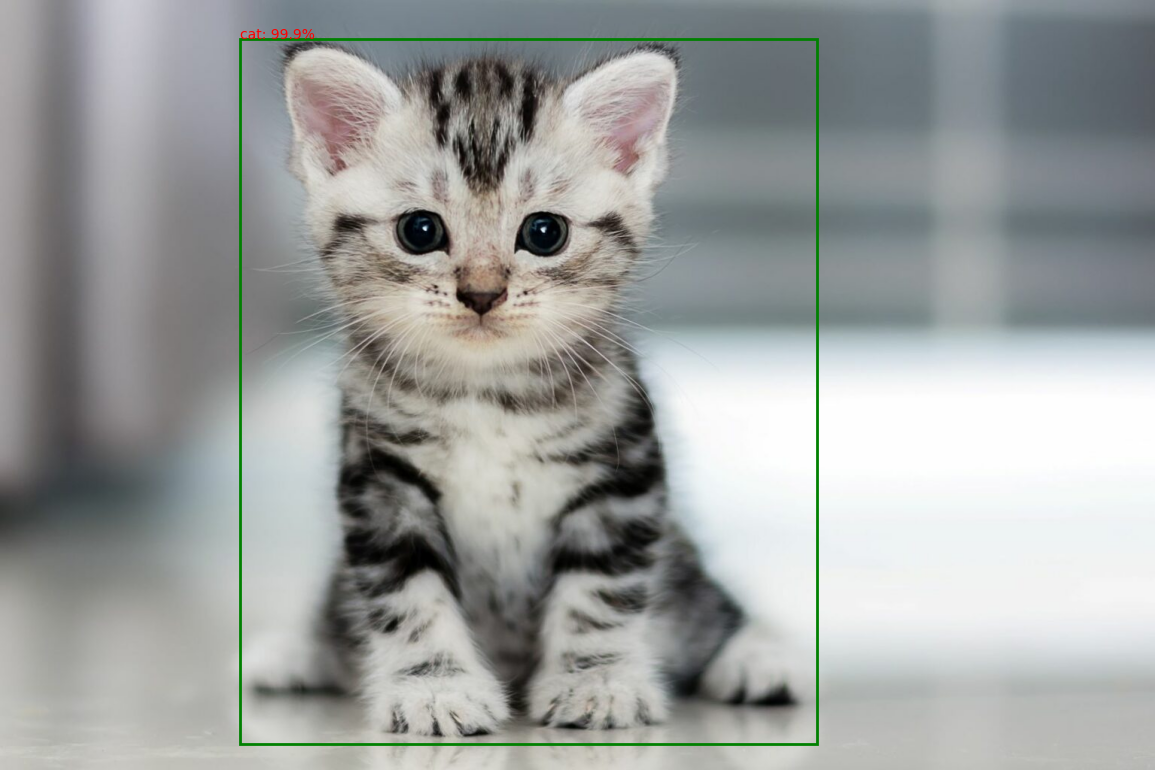

In [6]:
## Fit the Bounding box of Object in original image with Classfication
processed_image

In [7]:
## Get this image Explanation by Hugging face Models
corrected_text

'In this image, there is one cat.'

In [8]:
audio_data

array([-1.6788015e-04, -2.1801921e-04, -6.2103383e-04, ...,
       -3.7719798e-05,  2.6786303e-05, -1.5505598e-04], dtype=float32)

In [9]:
from IPython.display import Audio as IPythonAudio
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

## To Run the Streamlit app to get the Predictions

In [10]:
## Install these libraries before running streamlit app

# !pip install timm phonemizer inflect streamlit -q
# !npm install localtunnel -q
# !sudo apt-get install espeak -q

' !pip install timm phonemizer inflect streamlit -q\n!npm install localtunnel -q\n!sudo apt-get install espeak -q '

In [11]:
# Your public ip is the password to the localtunnel
!curl ipv4.icanhazip.com

35.227.18.2


In [12]:
## Run the app.py file with streamlit in port  and also get logs
!streamlit run app.py &>./logs.txt & npx localtunnel --port 8501

npx: installed 22 in 4.242s
your url is: https://gentle-mails-like.loca.lt
^C
